In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.cm as cm
    
import sys 
sys.path.insert(0, '../mcmc/src/')
import jsm_SHMR

from astropy.table import Table
import os
import warnings; warnings.simplefilter('ignore')
from matplotlib.colors import PowerNorm
import matplotlib.image as mpimg


sys.path.insert(0, '../../SatGen/src/')
import galhalo

In [3]:
halo_masses = np.linspace(8,12,100) # just for the model

In [4]:
mass_example = np.load("../../data/MW-analog/meta_data_psi4/models.npz")["mass"]
red_example = np.load("../../data/MW-analog/meta_data_psi4/models.npz")["redshift"]

mass_example = np.vstack(mass_example)
red_example = np.vstack(red_example)

In [5]:
mass_example = np.vstack(mass_example)

red_example = np.vstack(red_example)

In [6]:
N = 200

binH = np.linspace(8,12,N)
binS = np.linspace(2,10,N)

In [9]:
def plot_SHMR_dist(theta, theta_det):

    stellar_example = jsm_SHMR.general(theta, mass_example, red_example)

    flat_H = mass_example.flatten()
    flat_S = stellar_example.flatten()
    nanmask = ~np.isnan(flat_H)

    galhalo.lgMs_RP17(halo_masses, 0)

    plt.figure(figsize=(8, 6))
    plt.title(label="$\\theta$ = [$M_{*}$, $\\alpha$, $\\sigma$, $\\gamma$, $\\beta$, $\\tau$] = "+str(theta))
    plt.hist2d(flat_H[nanmask], flat_S[nanmask], bins=(binH, binS), norm=PowerNorm(gamma=0.2), cmap="Blues")
    plt.plot(halo_masses, jsm_SHMR.general(theta_det, halo_masses,0), color="navy", label="< log m$_{*}$ > ", lw=2)
    plt.plot(halo_masses, galhalo.lgMs_B13(halo_masses, 0), color="orange", ls="--", label="Behroozi 2013", lw=2)
    plt.plot(halo_masses, galhalo.lgMs_RP17(halo_masses, 0), color="red", ls="--", label="Rodriguez+Puebla 2017", lw=2)
    plt.ylabel("log m$_{*}$ (M$_\odot$)", fontsize=15)
    plt.xlabel("log m$_{\mathrm{peak}}$ (M$_\odot$)", fontsize=15)
    plt.legend()
    plt.show()

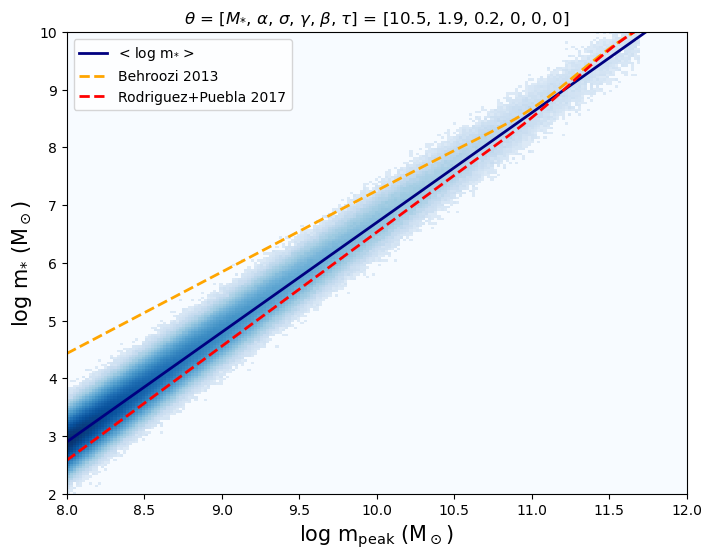

In [10]:
theta = [10.5, 1.9, 0.2, 0, 0, 0]

theta_det = [10.5, 1.9, 0.0, 0, 0, 0]

plot_SHMR_dist(theta, theta_det)

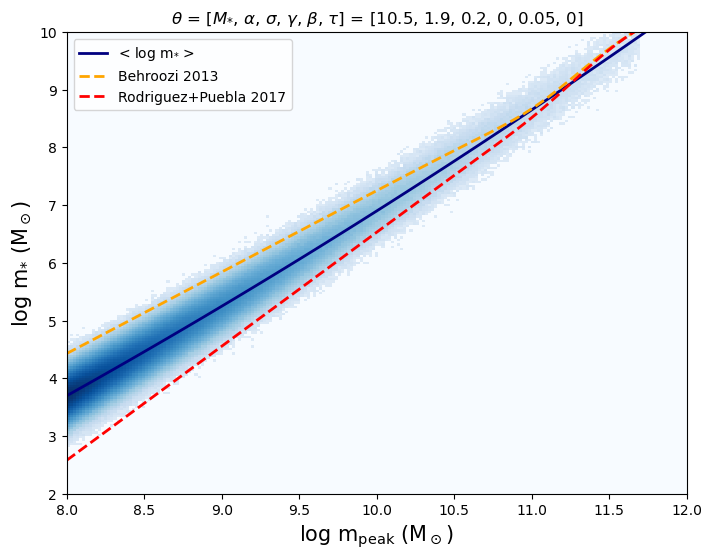

In [11]:
theta = [10.5, 1.9, 0.2, 0, 0.05, 0]

theta_det = [10.5, 1.9, 0.0, 0, 0.05, 0]

plot_SHMR_dist(theta, theta_det)

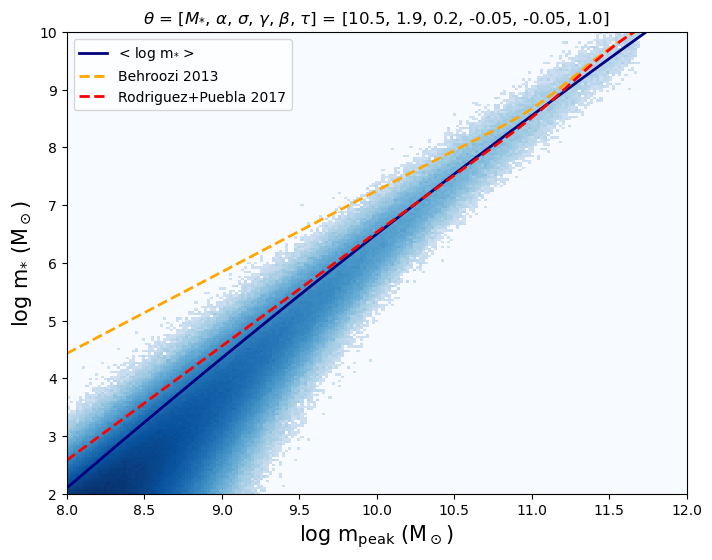

In [20]:
theta = [10.5, 1.9, 0.2, -0.05, -0.05, 1.]

theta_det = [10.5, 1.9, 0.0, 0, -0.05, 1.]

plot_SHMR_dist(theta, theta_det)

In [13]:
theta = [10.5, 1.9, 0.2, -0.05, 0.01, 1.2]

theta_det = [10.5, 1.9, 0.0, 0, 0.01, 1.2]

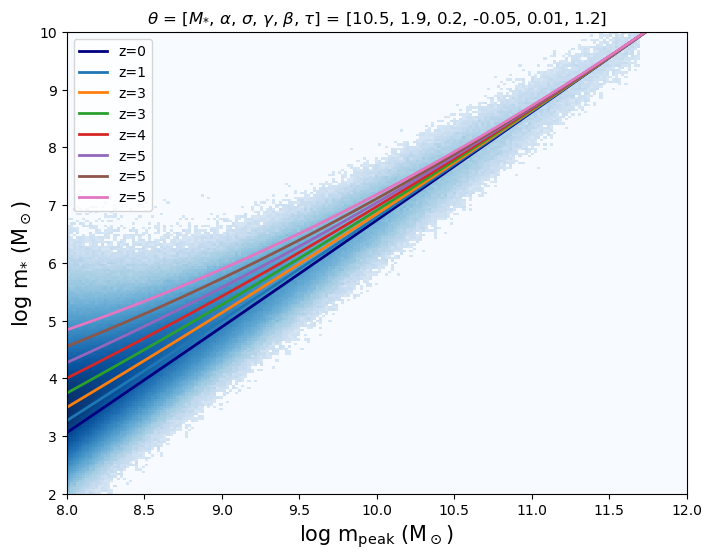

In [15]:
stellar_example = jsm_SHMR.general(theta, mass_example, red_example)

flat_H = mass_example.flatten()
flat_S = stellar_example.flatten()
nanmask = ~np.isnan(flat_H)

galhalo.lgMs_RP17(halo_masses, 0)

plt.figure(figsize=(8, 6))
plt.title(label="$\\theta$ = [$M_{*}$, $\\alpha$, $\\sigma$, $\\gamma$, $\\beta$, $\\tau$] = "+str(theta))

plt.hist2d(flat_H[nanmask], flat_S[nanmask], bins=(binH, binS), norm=PowerNorm(gamma=0.2), cmap="Blues")
plt.plot(halo_masses, jsm_SHMR.general(theta_det, halo_masses, 0),label="z=0", lw=2, color="navy")
plt.plot(halo_masses, jsm_SHMR.general(theta_det, halo_masses, 1),label="z=1", lw=2)
plt.plot(halo_masses, jsm_SHMR.general(theta_det, halo_masses, 2),label="z=3", lw=2)
plt.plot(halo_masses, jsm_SHMR.general(theta_det, halo_masses, 3),label="z=3", lw=2)
plt.plot(halo_masses, jsm_SHMR.general(theta_det, halo_masses, 4),label="z=4", lw=2)
plt.plot(halo_masses, jsm_SHMR.general(theta_det, halo_masses, 5),label="z=5", lw=2)
plt.plot(halo_masses, jsm_SHMR.general(theta_det, halo_masses, 6),label="z=5", lw=2)
plt.plot(halo_masses, jsm_SHMR.general(theta_det, halo_masses, 7),label="z=5", lw=2)



# plt.plot(halo_masses, galhalo.lgMs_B13(halo_masses, 0)=, ls="--", label="Behroozi 2013", lw=2)
# plt.plot(halo_masses, galhalo.lgMs_RP17(halo_masses, 0)=s="--", label="Rodriguez+Puebla 2017", lw=2)
plt.ylabel("log m$_{*}$ (M$_\odot$)", fontsize=15)
plt.xlabel("log m$_{\mathrm{peak}}$ (M$_\odot$)", fontsize=15)
plt.legend()
plt.show()

In [50]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# def create_2x2_grid(images):
#     fig, axs = plt.subplots(2, 2, figsize=(10,10))

#     for i in range(2):
#         for j in range(2):
#             img = mpimg.imread(images[i * 2 + j])
#             axs[i, j].imshow(img)
#             axs[i, j].axis('off')
#     plt.tight_layout()
#     plt.show()

# datadir = "../mcmc/figures/paper/"

# if __name__ == "__main__":
#     # Replace these file paths with your own PNG files
#     image_paths = [datadir+"complex1.png", datadir+"complex2.png", datadir+"complex3.png", datadir+"complex4.png"]

#     create_2x2_grid(image_paths)


In [ ]:
# def master_SHMR_1D(lgMh, alpha=1.82, delta=0, sigma=None, N_samples=1000, GK_norm=False, beta_norm=False):

#     """_summary_

#     a flexible Stellar to Halo Mass Relation that has a few tricks up its sleeve
#     Returns:
#         numpy array: stellar masses!
#     """

#     M_star_a = 10 # these are the anchor points
#     M_halo_a = 11.67

#     if sigma != None:
#         print("randomly sampling the lognormal PDF", N_samples, "times")

#         if GK_norm == True:
#             alpha_norm = 0.14*sigma**2 + 0.14*sigma+ 1.79
#             lgMs = alpha_norm*(lgMh-M_halo_a)  - delta*(lgMh-M_halo_a)**2 + M_star_a
#             scatter = np.random.normal(loc=0, scale=sigma, size=(N_samples, lgMs.shape[0]))
#             return lgMs + scatter
        
#         if beta_norm == True:
#             lgMs = alpha*(lgMh-M_halo_a) - delta*(lgMh-M_halo_a)**2 + M_star_a
#             scatter = np.random.normal(loc=0, scale=sigma, size=(N_samples, lgMs.shape[0]))
#             return lgMs + scatter - (sigma**2)/4.605
        
#         else:
#             print("not normalizing for the upscatter")
#             lgMs = alpha*(lgMh-M_halo_a) - delta*(lgMh-M_halo_a)**2 + M_star_a
#             scatter = np.random.normal(loc=0, scale=sigma, size=(N_samples, lgMs.shape[0]))
#             return lgMs + scatter

#     else:
#         print("assuming a deterministic SHMR")
#         lgMs = alpha*(lgMh-M_halo_a) - delta*(lgMh-M_halo_a)**2 + M_star_a
#         return lgMs

In [125]:
mass_example = np.load("../../data/MW-analog/meta_data_psi4/models.npz")["mass"]
red_example = np.load("../../data/MW-analog/meta_data_psi4/models.npz")["redshift"]

mass_example = np.vstack(mass_example)
red_example = np.vstack(red_example)

In [126]:
import time

start_time = time.monotonic()

simple = jsm_SHMR.general(theta, mass_example, red_example)

print('seconds: ', time.monotonic() - start_time)

seconds:  0.7712815420236439


In [127]:
start_time = time.monotonic()

simple = jsm_SHMR.general_v2(theta, mass_example, red_example)

print('seconds: ', time.monotonic() - start_time)

seconds:  0.7200418749707751
